## Titanic: Machine Learning from Disaster

In [562]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [563]:
# import the datasets  
titanic=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [564]:
# Displaying the test.csv file 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [565]:
# Displaying the train.csv file 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [566]:
print('Train dataset:\n',titanic.columns,'\n')
print('Test dataset:\n',test.columns)

Train dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

Test dataset:
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## To know Dtype a Train & Test DataFrame

In [567]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# To know Dtype a test DataFrame

In [568]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# Statistics of Train & Test DataFrame

In [569]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Statistics of Train DataFrame

In [570]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Analysis

/var/folders/b0/f1mlggvj2ndcgw3qcjmfd0nh0000gn/T/ipykernel_52003/1853669256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic, palette=color_palette)


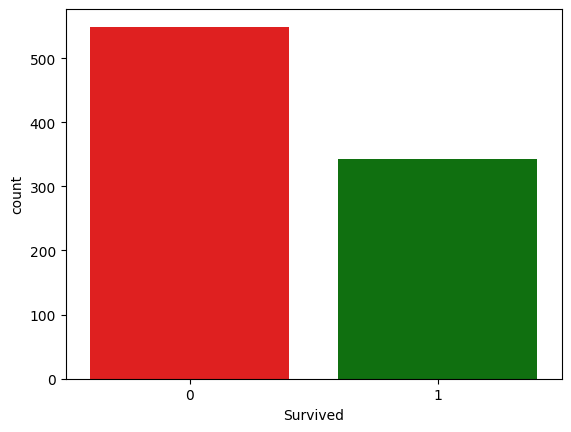

In [571]:
color_palette = ['red','green']
sns.countplot(x='Survived', data=titanic, palette=color_palette)
plt.show()

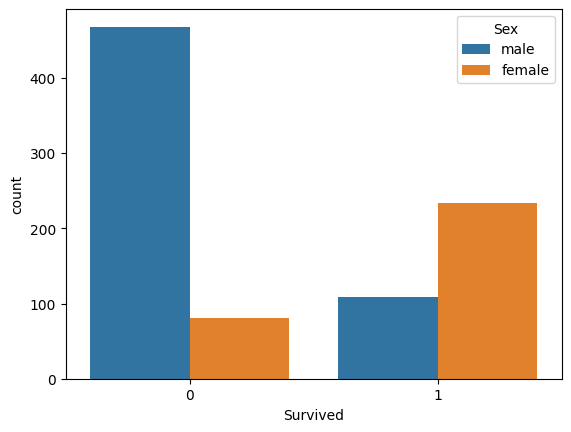

In [572]:
sns.countplot(x='Survived', data=titanic, hue='Sex')
plt.show()

# To find the 'NaN' Values in the dataset

In [573]:
print('Train dataset:\n',titanic.isna().sum(),'\n\n')
print('Test dataset:\n',test.isna().sum())


Train dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 


Test dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: >

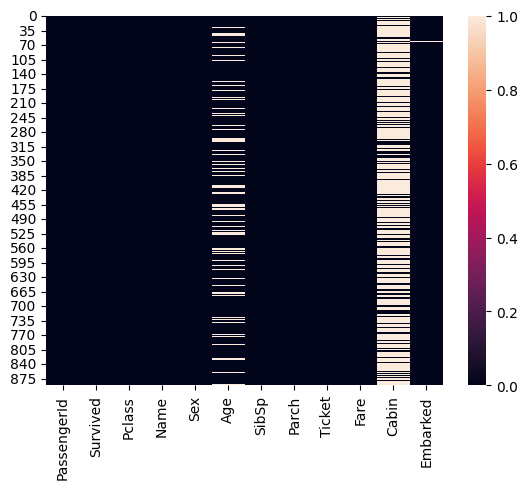

In [574]:
sns.heatmap(titanic.isna())

<Axes: >

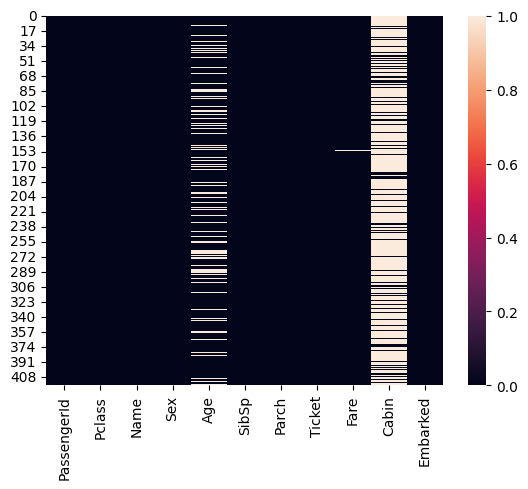

In [575]:
sns.heatmap(test.isna())

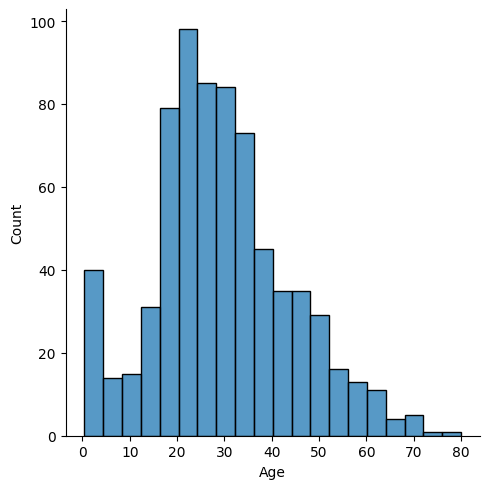

In [576]:
sns.displot(x='Age',data=titanic)

# Data Cleaning

For train dataset

In [577]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
print("'NaN' values in 'Age' attribute",titanic['Age'].isna().sum())

'NaN' values in 'Age' attribute 0


In [314]:
titanic['Age'].isna().sum()

0

<Axes: >

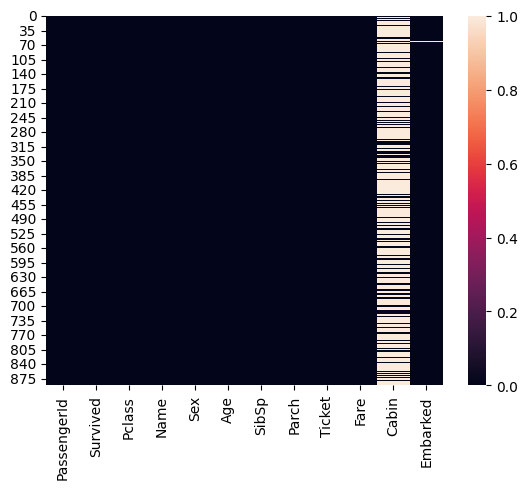

In [461]:
sns.heatmap(titanic.isna())

In [578]:
titanic['Embarked'].fillna(titanic.Embarked.mode()[0],inplace=True)
titanic[titanic['Embarked'].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [317]:
titanic[titanic['Embarked'].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [579]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [580]:
print("'NaN' values in 'Age' attribute",test['Age'].isna().sum())
print("'NaN' values in 'Fare' attribute",test['Fare'].isna().sum())

'NaN' values in 'Age' attribute 0
'NaN' values in 'Fare' attribute 0


<Axes: >

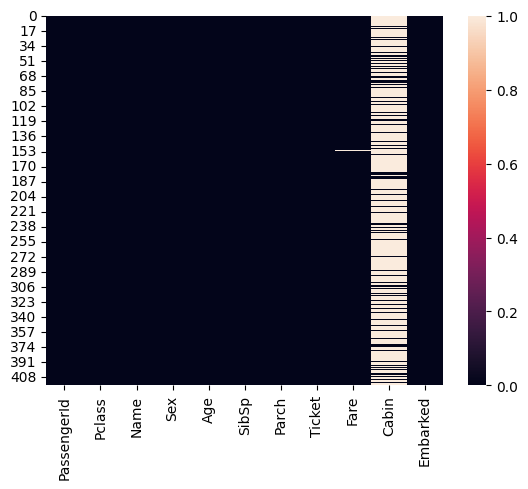

In [320]:
sns.heatmap(test.isna())

In [321]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [385]:
test['Fare'].isna().sum()

0

<Axes: >

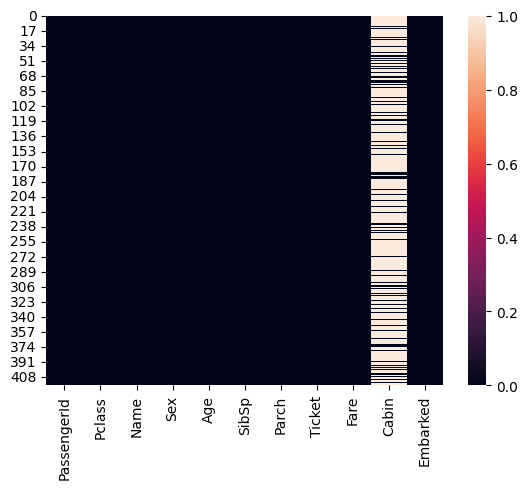

In [465]:
sns.heatmap(test.isna())

# Droping of Attributes 

For train dataset

In [581]:
titanic.drop('Cabin',axis=1,inplace=True)

In [582]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Converting 'sex' into Numerical value 

In [583]:
gender=pd.get_dummies(titanic['Sex'],drop_first=True)
gender = gender.astype(int)

In [584]:
titanic['Gender']=gender

In [585]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


# Droping of attributes from train and test datasest.  

In [586]:
titanic.drop(['Name','Sex','Ticket'],axis=1,inplace=True)

In [587]:
titanic.drop(['Embarked'],axis=1,inplace=True)

In [588]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


# Spliting the train dataset Modeling & validation 

In [589]:
x=titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=titanic['Survived']


In [590]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


Data cleaning for test.csv

In [591]:
test.drop('Cabin',axis=1,inplace=True)

In [592]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [593]:
gender=pd.get_dummies(test['Sex'],drop_first=True)
gender = gender.astype(int)

In [594]:
test['Gender']=gender

In [595]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [596]:
test.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [597]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


In [598]:
test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

# Data Modeling and validation case 

In [599]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [600]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [601]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [602]:
prd1=lr.predict(test)
prd=lr.predict(x_test)

In [603]:
from sklearn.metrics import confusion_matrix

In [604]:
confusion = confusion_matrix(y_test, prd)
confusion_df = pd.DataFrame(confusion, columns=['Pred No', 'Pred Yes'], index=['Actual No', 'Actual Yes'])
confusion_df

,Pred No,Pred Yes
Actual No,145,23
Actual Yes,31,69


In [605]:
from sklearn.metrics import classification_report

In [606]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.75      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



<Axes: >

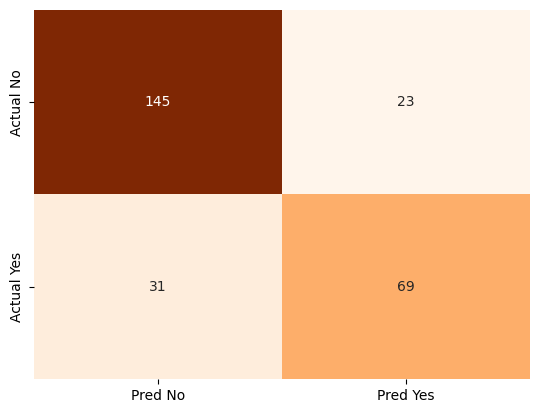

In [609]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges', cbar=False, xticklabels=['Pred No', 'Pred Yes'], yticklabels=['Actual No', 'Actual Yes'])


In [607]:
output = pd.DataFrame({'PassengerId':test.PassengerId,'Survived': prd1})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
